In [1]:
import tensorflow as tf
import numpy

In [3]:
a = tf.constant([1,2,3])

In [4]:
b = tf.constant([2,4,6])

In [5]:
c = a + b


In [9]:
print(c)

tf.Tensor([3 6 9], shape=(3,), dtype=int32)


In [11]:
z  = numpy.array([3,6,9])
zc = z+c

print(zc)

tf.Tensor([ 6 12 18], shape=(3,), dtype=int32)


In [32]:
import tensorflow as tf

i = tf.constant(0)
c = lambda i: tf.less(i, 100)

def b(i):
    array1 = tf.range(i)
    risultato = array1+i
    return risultato

#b = lambda i: (tf.add(i, 1), )
r = tf.while_loop(c, b, [i])

print(r[0])

ValueError: The two structures don't have the same nested structure.

First structure: type=list str=[TensorSpec(shape=(), dtype=tf.int32, name=None)]

Second structure: type=list str=[]

More specifically: The two structures don't have the same number of elements. First structure: type=list str=[TensorSpec(shape=(), dtype=tf.int32, name=None)]. Second structure: type=list str=[]
Entire first structure:
[.]
Entire second structure:
[]

In [ ]:
def condition(x):
    return tf.reduce_sum(x) < 100

x = tf.Variable(tf.constant(0, shape=[2, 2]))

with tf.Session():
    tf.global_variables_initializer().run()
    result = tf.while_loop(condition, body, [x])
    print(result.eval())

0.18892645835876465


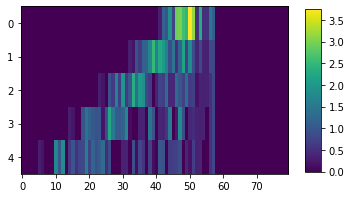

In [2]:
#quarta prova con unsorted segment sum
#programma semplificato per test e debug
import numpy
import tensorflow as tf
from matplotlib import pyplot
import time

#first i build a matrix of some x positions vs time datas in a sparse format
matrix = numpy.random.randint(2, size = 100).astype(float).reshape(10,10)
x = numpy.nonzero(matrix)[0]
times = numpy.nonzero(matrix)[1]
weights = numpy.random.rand(x.size)

#then i define an array of y positions
nStepsY = 5
y = numpy.arange(1,nStepsY+1)

nRows = nStepsY
nColumns = 80

start = time.time()
x = tf.constant(x, dtype = tf.float32)
times = tf.constant(times, dtype = tf.float32)
weights = tf.constant(weights, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)

def compute_row(i):
    yTimed = tf.multiply(y[i],times)
    positions = tf.round((x-yTimed)+50)
    positions = tf.cast(positions, dtype=tf.int32)
    values = tf.math.unsorted_segment_sum(weights, positions, nColumns)
    return values

image = tf.map_fn(compute_row, tf.range(0,nRows), dtype=tf.float32)
print(time.time()-start)

%matplotlib inline
pyplot.imshow(image, aspect = 10)
pyplot.colorbar(shrink = 0.75,aspect = 10)

0.03226161003112793


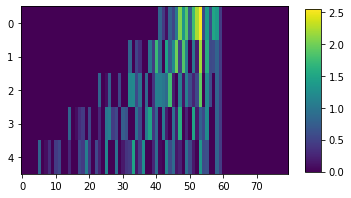

In [3]:
#quarta prova con unsorted segment sum
#programma semplificato per test e debug
import numpy
import tensorflow as tf
from tensorflow.python.client import timeline
from matplotlib import pyplot

#first i build a matrix of some x positions vs time datas in a sparse format
matrix = numpy.random.randint(2, size = 100).astype(float).reshape(10,10)
x = numpy.nonzero(matrix)[0]
times = numpy.nonzero(matrix)[1]
weights = numpy.random.rand(x.size)

#then i define an array of y positions
nStepsY = 5
y = numpy.arange(1,nStepsY+1)

nRows = nStepsY
nColumns = 80

start = time.time()
x = tf.constant(x, dtype = tf.float32)
times = tf.constant(times, dtype = tf.float32)
weights = tf.constant(weights, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)

i0 = tf.constant(0)
accumulator = tf.zeros((0, nColumns)) 

def compute_row(i):
    yTimed = tf.multiply(y[i],times)
    positions = tf.round((x-yTimed)+50)
    positions = tf.cast(positions, dtype=tf.int32)
    values = tf.math.unsorted_segment_sum(weights, positions, nColumns)
    return values

def loop_body(i, accumulator):
    new_row = compute_row(i)
    accumulator = tf.concat([accumulator, new_row[tf.newaxis,:]],axis=0)
    return i+1, accumulator

def cond(i,accumulator):
    return tf.less(i,nRows)

final_i, image = tf.while_loop(cond, loop_body, loop_vars=[i0, accumulator])
print(time.time()-start)

%matplotlib inline
pyplot.imshow(image, aspect = 10)
pyplot.colorbar(shrink = 0.75,aspect = 10)